# overlay mask on preprocessed .npy

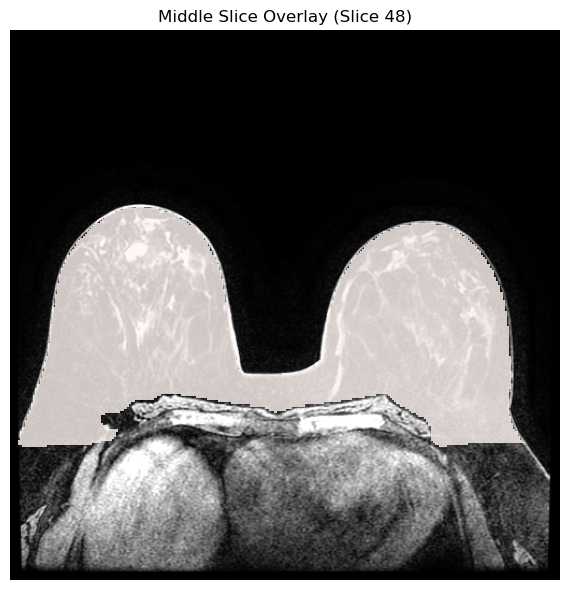

In [45]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
volume_path = "demo_preprocessed/100899T0.npy"
mask_path = "demo_result/breast/100899T0.seg.nrrd"

# ---------------- Load data ----------------
volume = np.load(volume_path)         # shape: (z, y, x)
mask, _ = nrrd.read(mask_path)        # shape: (z, y, x)

# Ensure shapes match
assert volume.shape == mask.shape, f"Shape mismatch: volume {volume.shape}, mask {mask.shape}"

# ---------------- Middle slice ----------------
mid_slice = volume.shape[2] // 2 - 5
vol_slice = volume[: , :, mid_slice]
mask_slice = mask[: , :, mid_slice]

# ---------------- Normalize image ----------------
def normalize(img):
    img = img.astype(np.float32)
    img = np.clip(img, np.percentile(img, 1), np.percentile(img, 99))
    img -= img.min()
    img /= img.max()
    return img

vol_slice_norm = normalize(vol_slice)

# ---------------- Plot overlay ----------------
plt.figure(figsize=(6, 6))
plt.imshow(vol_slice_norm, cmap='gray')
plt.imshow(np.ma.masked_where(mask_slice == 0, mask_slice), cmap='Reds', alpha=0.8)
plt.title(f'Middle Slice Overlay (Slice {mid_slice})')
plt.axis('off')
plt.tight_layout()
plt.show()

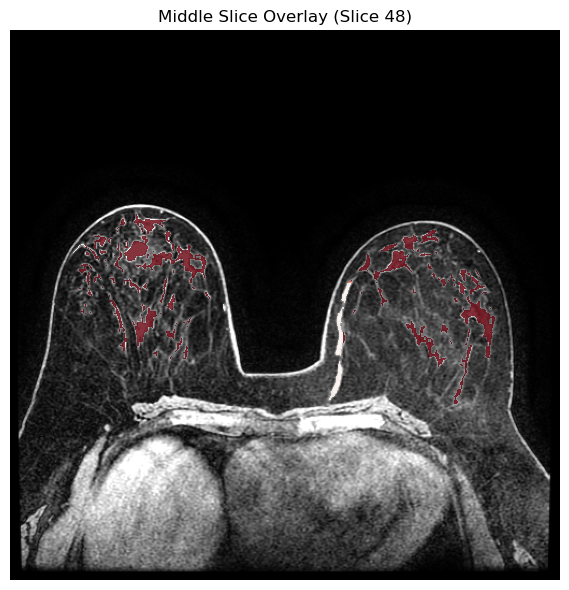

In [44]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
volume_path = "demo_preprocessed/100899T0.npy"
mask_path = "demo_result/dv/100899T0.seg.nrrd"

# ---------------- Load data ----------------
volume = np.load(volume_path)         # shape: (z, y, x)
mask, _ = nrrd.read(mask_path)        # shape: (z, y, x)

# Ensure shapes match
assert volume.shape == mask.shape, f"Shape mismatch: volume {volume.shape}, mask {mask.shape}"

# ---------------- Middle slice ----------------
mid_slice = volume.shape[2] // 2 - 5
vol_slice = volume[: , :, mid_slice]
mask_slice = mask[: , :, mid_slice]

# ---------------- Normalize image ----------------
def normalize(img):
    img = img.astype(np.float32)
    img = np.clip(img, np.percentile(img, 1), np.percentile(img, 99))
    img -= img.min()
    img /= img.max()
    return img

vol_slice_norm = normalize(vol_slice)

# ---------------- Plot overlay ----------------
plt.figure(figsize=(6, 6))
plt.imshow(vol_slice_norm, cmap='gray')
plt.imshow(np.ma.masked_where(mask_slice == 0, mask_slice), cmap='Reds', alpha=0.8)
plt.title(f'Middle Slice Overlay (Slice {mid_slice})')
plt.axis('off')
plt.tight_layout()
plt.show()

# overlay mask on raw .dicom

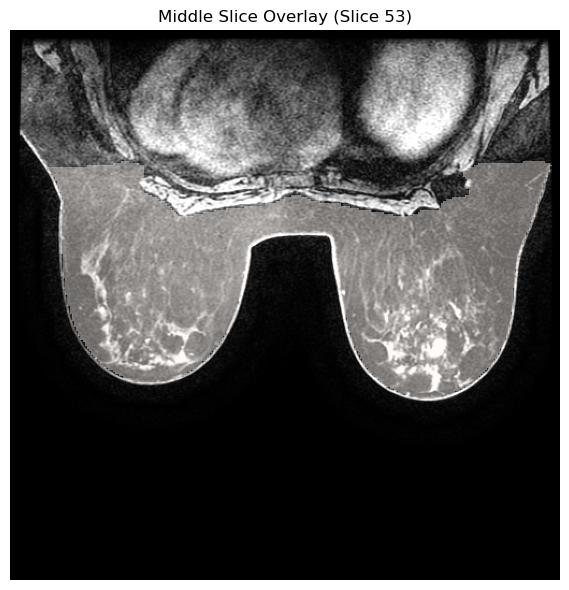

In [52]:
import os
import numpy as np
import pydicom
import nrrd
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
dicom_folder = "demo_raw/500.000000-ISPY2 AX VIBRANT-SERIES-52523"   # Path to the DICOM folder
mask_path = "demo_result/breast/100899T0.seg.nrrd"            # Path to the mask

# ---------------- Load DICOM Volume ----------------
def load_dicom_volume(folder):
    dicoms = []
    for f in sorted(os.listdir(folder)):
        path = os.path.join(folder, f)
        try:
            ds = pydicom.dcmread(path)
            dicoms.append((ds, ds.InstanceNumber if 'InstanceNumber' in ds else None))
        except Exception:
            continue

    # Sort by InstanceNumber (fallback to filename order)
    dicoms.sort(key=lambda x: x[1] if x[1] is not None else 0)
    slices = [d.pixel_array for d, _ in dicoms]
    volume = np.stack(slices, axis=2)
    return volume.astype(np.int16)

volume = load_dicom_volume(dicom_folder)

# ---------------- Load Mask ----------------
mask, _ = nrrd.read(mask_path)
assert volume.shape == mask.shape, f"Shape mismatch: volume {volume.shape}, mask {mask.shape}"

# ---------------- Middle Slice ----------------
mid_slice = volume.shape[2] // 2
vol_slice = volume[:, :, mid_slice]
mask = mask[::-1, ::-1, :]
mask_slice = mask[:, :, mid_slice]

# ---------------- Normalize Volume ----------------
def normalize(img):
    img = img.astype(np.float32)
    img = np.clip(img, np.percentile(img, 1), np.percentile(img, 99))
    img -= img.min()
    img /= img.max()
    return img

vol_slice_norm = normalize(vol_slice)

# ---------------- Plot Overlay ----------------
plt.figure(figsize=(6, 6))
plt.imshow(vol_slice_norm, cmap='gray')
plt.imshow(np.ma.masked_where(mask_slice == 0, mask_slice), cmap='Reds', alpha=0.4)
plt.title(f'Middle Slice Overlay (Slice {mid_slice})')
plt.axis('off')
plt.tight_layout()
plt.show()

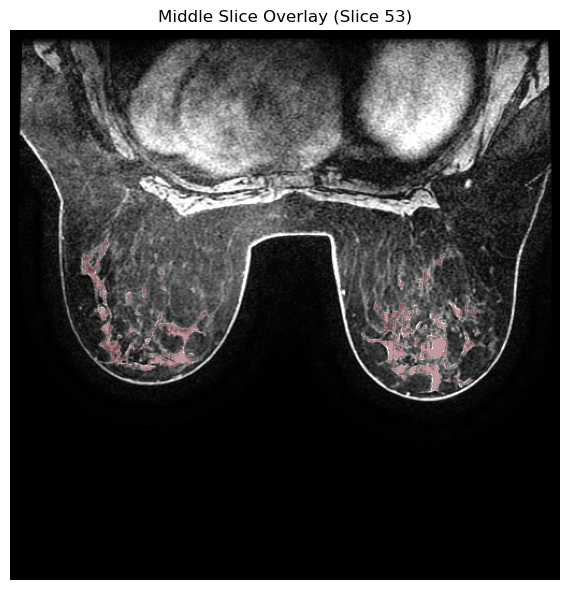

In [53]:
import os
import numpy as np
import pydicom
import nrrd
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
dicom_folder = "demo_raw/500.000000-ISPY2 AX VIBRANT-SERIES-52523"   # Path to the DICOM folder
mask_path = "demo_result/dv/100899T0.seg.nrrd"            # Path to the mask

# ---------------- Load DICOM Volume ----------------
def load_dicom_volume(folder):
    dicoms = []
    for f in sorted(os.listdir(folder)):
        path = os.path.join(folder, f)
        try:
            ds = pydicom.dcmread(path)
            dicoms.append((ds, ds.InstanceNumber if 'InstanceNumber' in ds else None))
        except Exception:
            continue

    # Sort by InstanceNumber (fallback to filename order)
    dicoms.sort(key=lambda x: x[1] if x[1] is not None else 0)
    slices = [d.pixel_array for d, _ in dicoms]
    volume = np.stack(slices, axis=2)
    return volume.astype(np.int16)

volume = load_dicom_volume(dicom_folder)

# ---------------- Load Mask ----------------
mask, _ = nrrd.read(mask_path)
assert volume.shape == mask.shape, f"Shape mismatch: volume {volume.shape}, mask {mask.shape}"

# ---------------- Middle Slice ----------------
mid_slice = volume.shape[2] // 2
vol_slice = volume[:, :, mid_slice]
mask = mask[::-1, ::-1, :]
mask_slice = mask[:, :, mid_slice]

# ---------------- Normalize Volume ----------------
def normalize(img):
    img = img.astype(np.float32)
    img = np.clip(img, np.percentile(img, 1), np.percentile(img, 99))
    img -= img.min()
    img /= img.max()
    return img

vol_slice_norm = normalize(vol_slice)

# ---------------- Plot Overlay ----------------
plt.figure(figsize=(6, 6))
plt.imshow(vol_slice_norm, cmap='gray')
plt.imshow(np.ma.masked_where(mask_slice == 0, mask_slice), cmap='Reds', alpha=0.4)
plt.title(f'Middle Slice Overlay (Slice {mid_slice})')
plt.axis('off')
plt.tight_layout()
plt.show()